In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
data = data.drop(['Unnamed: 0', 'key'], axis = 1)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
data.shape

(200000, 7)

In [8]:
data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
data['dropoff_longitude'].fillna(value = data['dropoff_longitude'].mean(), inplace = True)
data['dropoff_latitude'].fillna(value = data['dropoff_latitude'].mean(), inplace = True)

In [12]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
data.pickup_datetime = pd.to_datetime(data.pickup_datetime, errors='coerce')
#The "errors='coerce'" argument tells Pandas to ignore any rows that cannot be parsed into a datetime format.

In [15]:
data.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [16]:
data = data.assign(hour = data.pickup_datetime.dt.hour,
                  day = data.pickup_datetime.dt.day,
                  month = data.pickup_datetime.dt.month,
                  year = data.pickup_datetime.dt.year,
                  dayofweek = data.pickup_datetime.dt.dayofweek)

In [17]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [18]:
data = data.drop('pickup_datetime', axis =1)

In [19]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

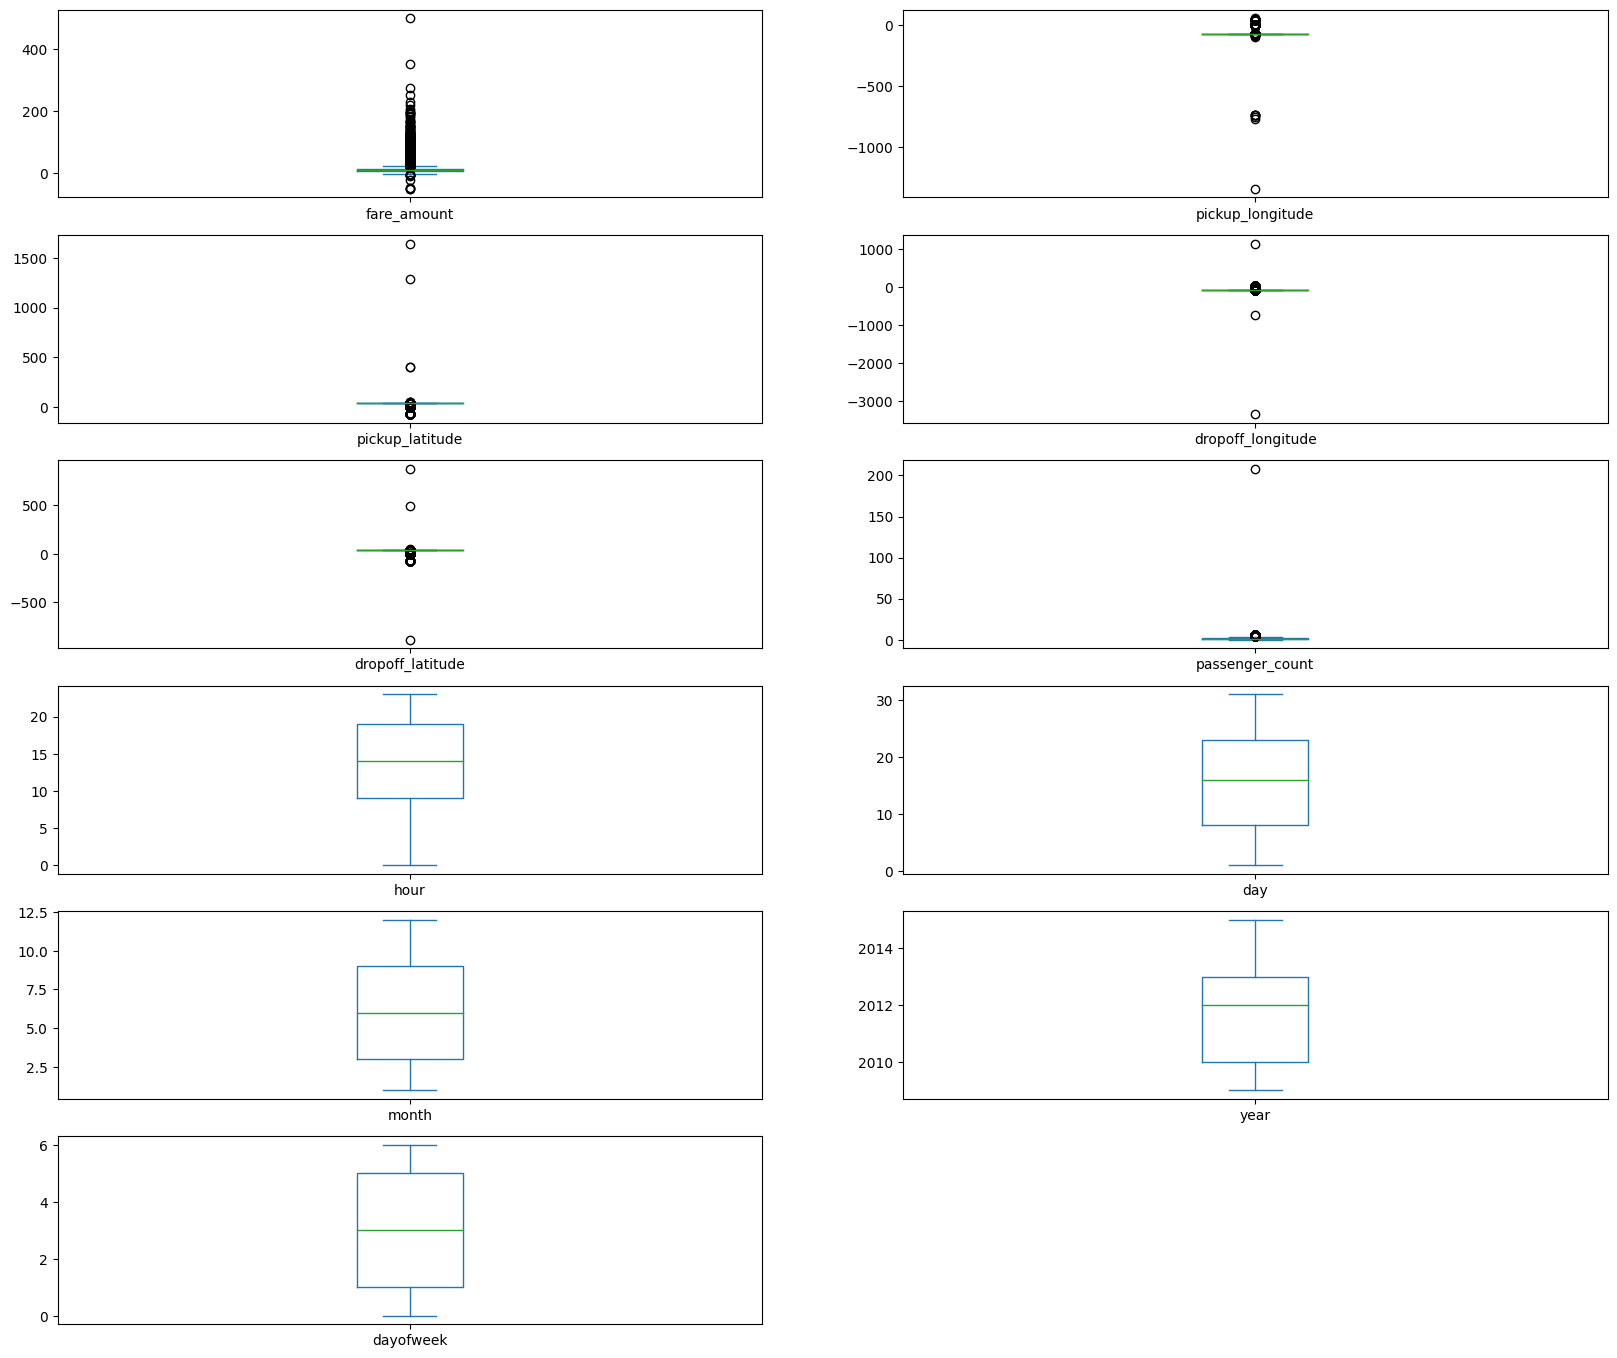

In [21]:
data.plot(kind = "box", subplots = True, layout = (7,2), figsize = (20,20))

{'whiskers': [<matplotlib.lines.Line2D at 0x1301a657e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1301a6673a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1301a657b80>],
 'medians': [<matplotlib.lines.Line2D at 0x1301a6678e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1301a667b80>],
 'means': []}

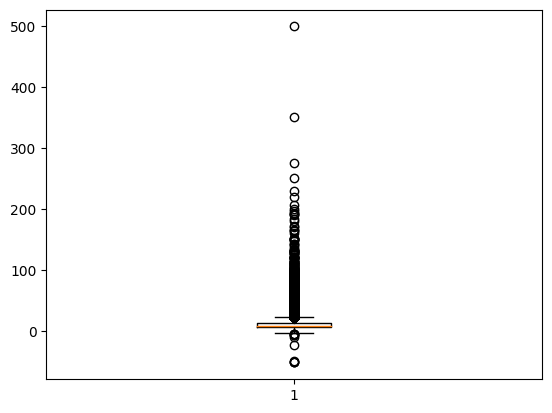

In [23]:
plt.boxplot(data['fare_amount'])

In [43]:
Q1 = data['fare_amount'].quantile(0.25)
Q3 = data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['fare_amount'] < lower_bound) | (data['fare_amount'] > upper_bound)]
outliers

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
6,24.50,-73.961447,40.693965,-73.871195,40.774297,5,7,12,10,2014,6
30,25.70,-73.944815,40.834367,-73.989332,40.721920,4,9,21,5,2011,5
34,39.50,-73.788080,40.642187,-73.865042,40.725997,4,6,4,6,2014,2
39,29.00,-73.992600,40.753172,-73.908508,40.816192,1,17,13,2,2014,3
48,56.80,-73.993498,40.764686,-73.993498,40.764686,1,22,3,1,2013,3
...,...,...,...,...,...,...,...,...,...,...,...
199976,49.70,-73.978225,40.783318,-73.700963,40.705852,1,23,18,10,2011,1
199977,43.50,-73.996671,40.737483,-73.867758,40.897563,1,21,20,11,2012,1
199982,57.33,-73.969204,40.754771,-73.790351,40.643802,1,11,6,8,2014,2
199985,24.00,-74.005089,40.737301,-73.945290,40.774162,5,15,18,4,2015,5


<Axes: >

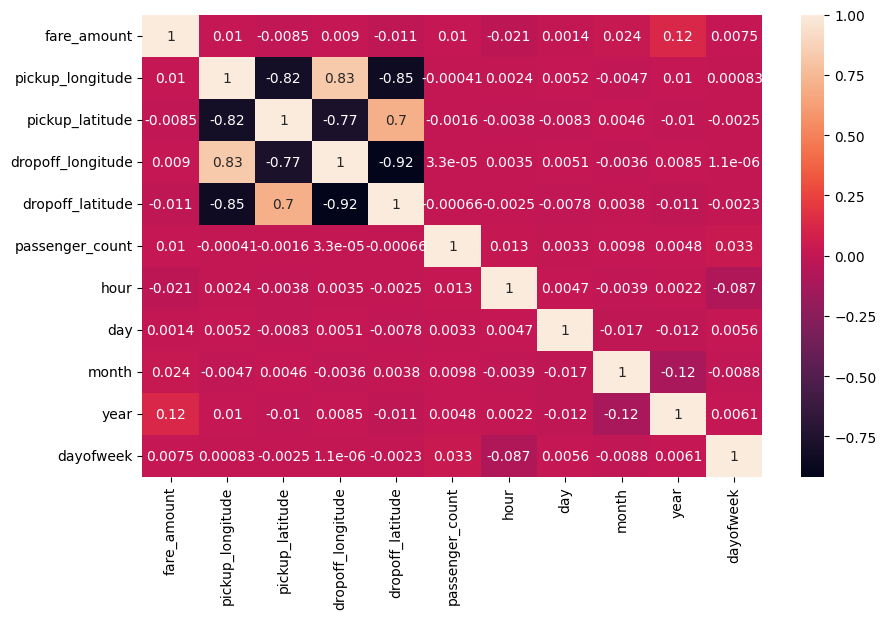

In [44]:
corr = data.corr()
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(corr, annot = True)
#Correlation Heatmap (Light values means highly correlated)

In [28]:
x = data[['pickup_longitude',
          'pickup_latitude',
          'dropoff_longitude',
          'dropoff_latitude',
          'passenger_count',
          'hour',
          'day',
          'month',
          'year',
          'dayofweek']]
y = data['fare_amount']

In [31]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [32]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression() 
regression.fit(x_train,y_train) 
#regression.intercept_    #To find the linear intercept 
#regression.coef_    #To find the linear coeeficient
prediction = regression.predict(x_test)    #To predict the target values 
print(prediction) 
y_test

[10.6889506  11.99879559 11.43778293 ... 11.15048882 12.18331301
 12.07459054]


178102    13.30
65892     41.83
178425     8.10
199727     5.50
47055      7.00
          ...  
8352      10.50
22998      5.30
39750      8.10
257        8.00
44541     10.50
Name: fare_amount, Length: 60000, dtype: float64

In [36]:
from sklearn.metrics import r2_score
linear_reg_r2 = r2_score(y_test,prediction)
print("linear reg r2 score: ",linear_reg_r2)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
linear_reg_RMSE = np.sqrt(MSE)
print("linear reg rmse score:",linear_reg_RMSE)

linear reg r2 score:  0.015274055470600456
linear reg rmse score: 9.753693919644872


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred

array([16.332 , 35.5173,  9.505 , ...,  8.759 ,  6.764 , 12.955 ])

In [38]:
random_forest_r2 = r2_score(y_test,y_pred)
print("random forest r2 score: ", random_forest_r2)
MSE_Random = mean_squared_error(y_test,y_pred)
random_forest_RMSE = np.sqrt(MSE_Random)
print("random forest rmse: ", random_forest_RMSE)

random forest r2 score:  0.7901348351549753
random forest rmse:  4.502789151432805
